# Bayesian Data Analysis in Python

## Chapter 4

In [13]:
import numpy as np
import pandas as pd
import arviz as az
import bambi as bm
import pymc as pm
import seaborn as sns
from matplotlib import pyplot as plt

based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. 

In [14]:
bikes = pd.read_csv("bikes_test.csv")
bikes

,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830
5,1,0.280833,0.540000,0.116929,3.831
6,0,0.224167,0.731250,0.289796,2.169
7,0,0.127500,0.464583,0.409212,1.529
8,1,0.222500,0.411250,0.167283,3.422
9,1,0.319167,0.508750,0.141179,3.922


In [21]:
formula = "num_bikes ~ temp + work_day"

model_1 = bm.Model(formula, bikes)
results_1 = model_1.fit(draws=1000, chains=4)
    
#trace_1 = pm.sample(draws=1000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [num_bikes_sigma, Intercept, temp, work_day]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'work_day'}>,
        <Axes: title={'center': 'work_day'}>],
       [<Axes: title={'center': 'num_bikes_sigma'}>,
        <Axes: title={'center': 'num_bikes_sigma'}>]], dtype=object)

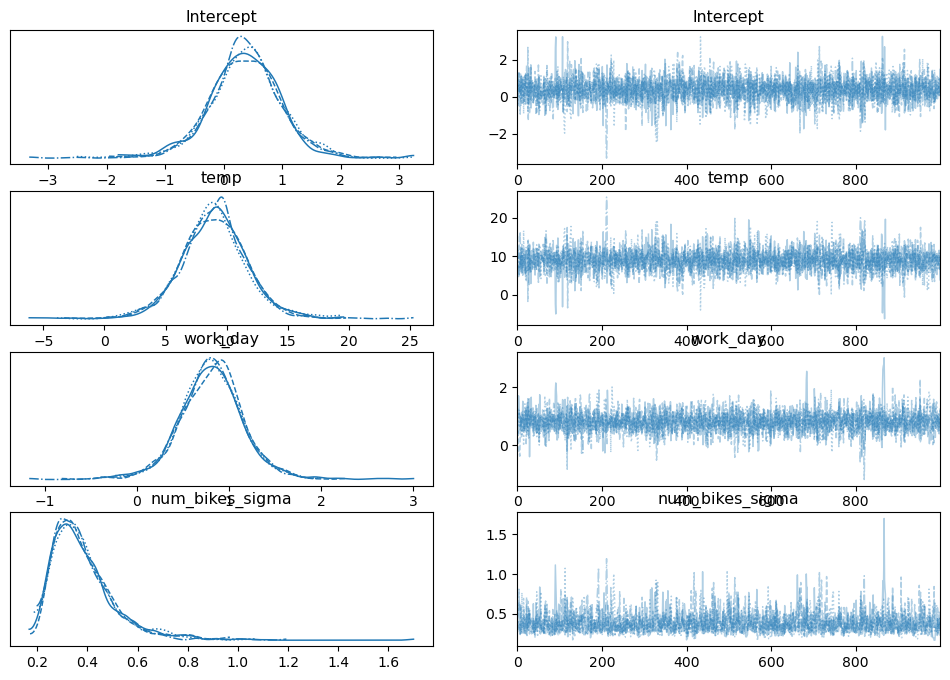

In [22]:
az.plot_trace(results_1)

In [23]:
az.summary(results_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.369,0.613,-0.779,1.561,0.011,0.009,3413.0,2290.0,1.0
temp,8.951,2.749,3.825,14.222,0.052,0.038,2852.0,2154.0,1.0
work_day,0.812,0.347,0.160,1.470,0.007,0.005,2717.0,2373.0,1.0
num_bikes_sigma,0.383,0.129,0.195,0.611,0.003,0.002,1551.0,1721.0,1.0


In [24]:
formula = "num_bikes ~ temp + work_day + wind_speed"

model_2 = bm.Model(formula, bikes)
results_2 = model_2.fit(draws=1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [num_bikes_sigma, Intercept, temp, work_day, wind_speed]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'work_day'}>,
        <Axes: title={'center': 'work_day'}>],
       [<Axes: title={'center': 'wind_speed'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'num_bikes_sigma'}>,
        <Axes: title={'center': 'num_bikes_sigma'}>]], dtype=object)

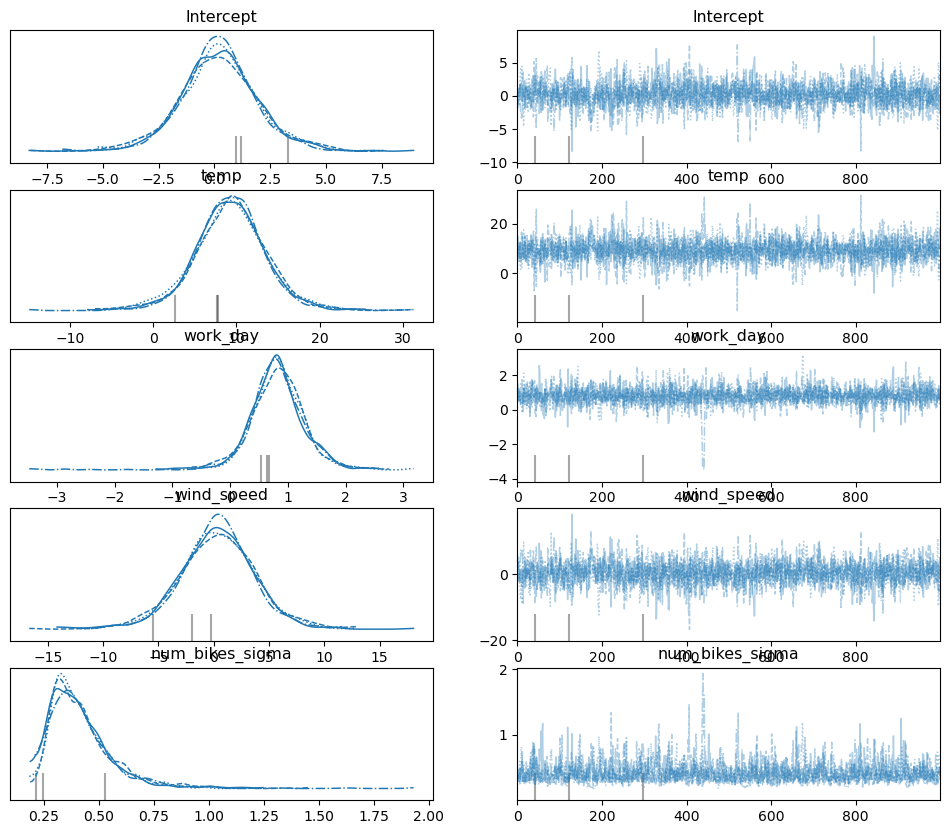

In [25]:
az.plot_trace(results_2)

In [26]:
az.summary(results_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.210,1.732,-3.307,3.462,0.039,0.034,2007.0,1593.0,1.0
temp,9.294,4.246,1.606,17.847,0.092,0.067,2140.0,1858.0,1.0
work_day,0.820,0.475,0.038,1.772,0.011,0.008,2571.0,2217.0,1.0
wind_speed,0.330,3.389,-5.848,7.189,0.075,0.064,2019.0,1852.0,1.0
num_bikes_sigma,0.418,0.148,0.199,0.670,0.004,0.003,1127.0,885.0,1.0
